In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
# Read the excel file 'Data_Progyny.xlsx' and 'Progyny_MetaData.xlsx' into a pandas DataFrame
data = pd.read_excel('Data_Progyny.xlsx')
meta = pd.read_excel('Progyny_MetaData.xlsx')
data.head()

,Client Key,Type,Treatment Type,DOS,Rev
0,AC-000836,Product 1,Initial Consult & Ancillaries,2016-01-01,2033.27
1,AC-000836,Product 1,IUI,2016-01-01,1563.56
2,AC-000836,Product 1,IVF Freeze-All,2016-01-01,11817.29
3,AC-000836,Product 1,Storage,2016-01-01,90.00
4,AC-000836,Product 1,Traditional Fresh IVF,2016-01-01,2236.34


In [144]:
# Read csv file 'Data_Progyny.csv' into a pandas DataFrame
data_csv = pd.read_csv('Data_Progyny_1.csv')
data_csv.head()

meta_csv = pd.read_csv('Progyny_MetaData_1.csv')
meta_csv.head()

,Client Key,Product 1 Go Live Date,Product 2 Go Live Date
0,AC-000241,7/1/20,7/1/20
1,AC-000293,8/1/19,8/1/19
2,AC-000836,1/1/16,NaN
3,AC-001352,1/1/20,1/1/20
4,AC-002622,1/1/16,1/1/20


In [87]:
# Business Insights which could be derived from the data

In [88]:
# Ensure we include only the necessary columns in the merged dataset
# We'll keep 'Client Key', 'Type', 'Treatment Type', 'DOS', 'Rev', and the 'Go Live Date' columns

# Rename go live date columns for easier handling
meta_data_progyny = meta.rename(columns={
    'Product 1 Go Live Date': 'Product1_Go_Live_Date',
    'Product 2 Go Live Date': 'Product2_Go_Live_Date'
})

# Merge data based on 'Client Key'
merged_data = pd.merge(
    data[['Client Key', 'Type', 'Treatment Type', 'DOS', 'Rev']],
    meta_data_progyny[['Client Key', 'Product1_Go_Live_Date', 'Product2_Go_Live_Date']],
    on='Client Key', how='left'
)

# Convert Go Live Dates to datetime for comparison
merged_data['Product1_Go_Live_Date'] = pd.to_datetime(merged_data['Product1_Go_Live_Date'])
merged_data['Product2_Go_Live_Date'] = pd.to_datetime(merged_data['Product2_Go_Live_Date'])

# Display the first few rows of the cleaned and merged data for verification
merged_data.head()

,Client Key,Type,Treatment Type,DOS,Rev,Product1_Go_Live_Date,Product2_Go_Live_Date
0,AC-000836,Product 1,Initial Consult & Ancillaries,2016-01-01,2033.27,2016-01-01,NaT
1,AC-000836,Product 1,IUI,2016-01-01,1563.56,2016-01-01,NaT
2,AC-000836,Product 1,IVF Freeze-All,2016-01-01,11817.29,2016-01-01,NaT
3,AC-000836,Product 1,Storage,2016-01-01,90.00,2016-01-01,NaT
4,AC-000836,Product 1,Traditional Fresh IVF,2016-01-01,2236.34,2016-01-01,NaT


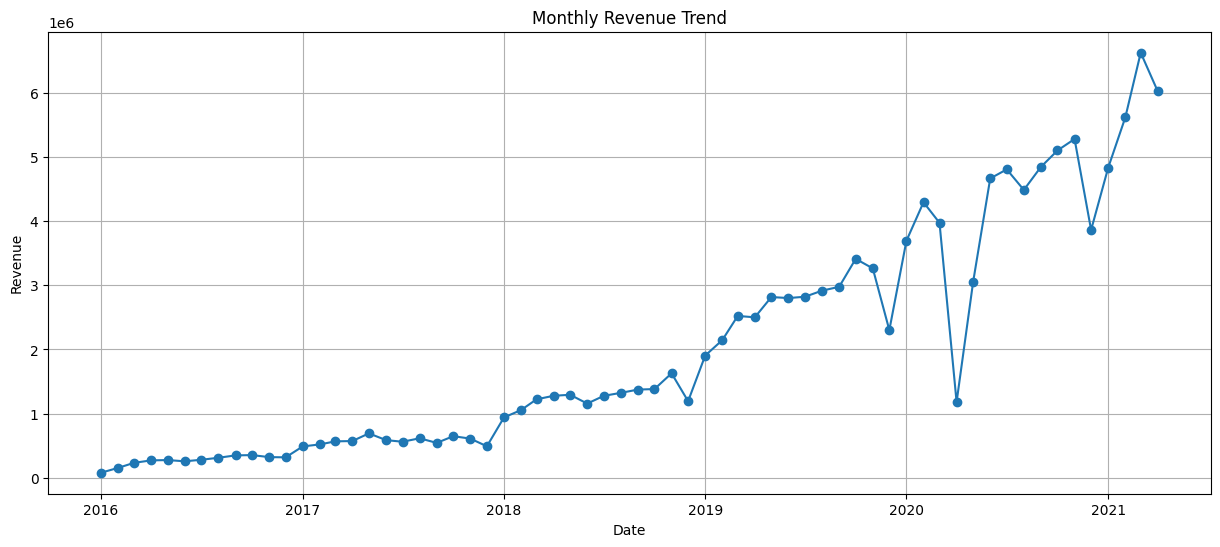

In [94]:
# Revenue Trend Analysis - Monthly revenue trends
monthly_revenue_trend = merged_data.groupby(merged_data['DOS'].dt.to_period("M"))['Rev'].sum().reset_index()
monthly_revenue_trend['DOS'] = monthly_revenue_trend['DOS'].dt.to_timestamp()

# Plot the monthly revenue trend
plt.figure(figsize=(15, 6))
plt.plot(monthly_revenue_trend['DOS'], monthly_revenue_trend['Rev'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.show()

In [ ]:
'''

Business Insights:

1.) Steady Growth Over Time: The upward trend in revenue shows that the business has been growing steadily. This could be due to attracting more clients or increasing engagement with existing ones. It's a good sign that things are on the right track!

2.) Seasonal Patterns: We can see some dips in certain months, especially around late 2019 and early 2020. This could suggest that business is affected by seasonal factors – perhaps clients have specific times of the year when they’re more active. Understanding these patterns can help in planning resources and campaigns more effectively.

3.) Impact of Major Events: Early 2020 shows a sharp drop, likely linked to the COVID-19 pandemic. This reminds us of how global events can suddenly impact revenue. Recognizing these shifts can help the business be more resilient and adaptable to unexpected changes in the future.

'''

"\n1.) Steady Growth Over Time: The upward trend in revenue shows that the business has been growing steadily. This could be due to attracting more clients or increasing engagement with existing ones. It's a good sign that things are on the right track!\n\n2.) Seasonal Patterns: We can see some dips in certain months, especially around late 2019 and early 2020. This could suggest that business is affected by seasonal factors – perhaps clients have specific times of the year when they’re more active. Understanding these patterns can help in planning resources and campaigns more effectively.\n\n3.) Impact of Major Events: Early 2020 shows a sharp drop, likely linked to the COVID-19 pandemic. This reminds us of how global events can suddenly impact revenue. Recognizing these shifts can help the business be more resilient and adaptable to unexpected changes in the future.\n\n"

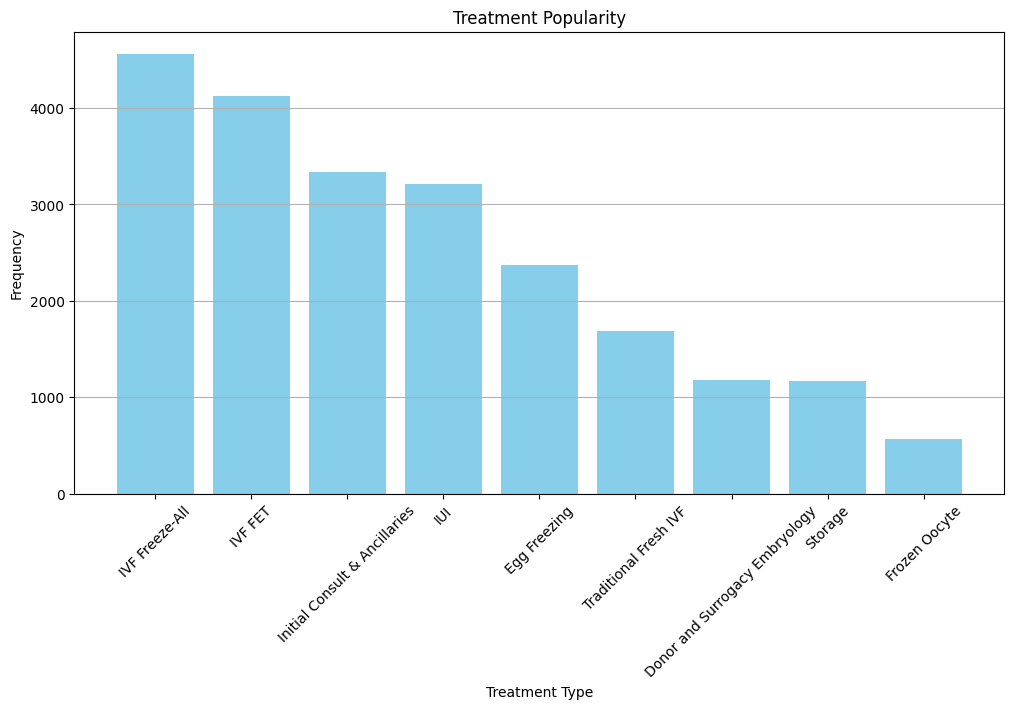

In [98]:
# Insight 3: Treatment Popularity - Frequency and total revenue for each treatment type
treatment_popularity = merged_data.groupby('Treatment Type').agg(
    Treatment_Count=('Treatment Type', 'size'),
    Total_Revenue=('Rev', 'sum')
).reset_index()

# Sort the treatments by frequency

treatment_popularity = treatment_popularity.sort_values(by='Treatment_Count', ascending=False)

# Plot the treatment popularity
plt.figure(figsize=(12, 6))
plt.bar(treatment_popularity['Treatment Type'], treatment_popularity['Treatment_Count'], color='skyblue')
plt.title('Treatment Popularity')
plt.xlabel('Treatment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [100]:
'''

Business Insights:

1.) IVF Treatments Are in High Demand: The "IVF Freeze-All" and "IVF FET" treatments top the chart, with the highest frequency among clients. This shows that IVF-related services are central to the business and may benefit from focused resources, marketing, and continued improvement, as they seem to be the primary driver of client engagement.

2.) Consultations and Ancillary Services Are Also Popular: "Initial Consult & Ancillaries" has a strong presence. This indicates that many clients seek guidance or initial advice before diving into specific treatments, emphasizing the importance of providing an informative and supportive experience for new clients.

3.) Opportunities for Niche Services: Treatments like "Frozen Oocyte" have lower frequencies, suggesting these may serve a more niche segment of clients. While they aren’t as popular, promoting these services to targeted audiences or using them as value-added options could help in tapping into specific client needs.

'''

'\n\nBusiness Insights:\n\n1.) IVF Treatments Are in High Demand: The "IVF Freeze-All" and "IVF FET" treatments top the chart, with the highest frequency among clients. This shows that IVF-related services are central to the business and may benefit from focused resources, marketing, and continued improvement, as they seem to be the primary driver of client engagement.\n\n2.) Consultations and Ancillary Services Are Also Popular: "Initial Consult & Ancillaries" has a strong presence. This indicates that many clients seek guidance or initial advice before diving into specific treatments, emphasizing the importance of providing an informative and supportive experience for new clients.\n\n3.) Opportunities for Niche Services: Treatments like "Frozen Oocyte" have lower frequencies, suggesting these may serve a more niche segment of clients. While they aren’t as popular, promoting these services to targeted audiences or using them as value-added options could help in tapping into specific c

Top 10% High-Value Clients by Revenue
   Client Key          Rev
4   AC-002622  27460488.30
27  AC-003620  17308675.75
2   AC-000836  10743731.53
32  AC-003670  10502087.65
16  AC-003283   5367488.85
19  AC-003452   3791834.06
9   AC-003202   3467446.45
31  AC-003640   3109428.98
21  AC-003476   2330276.39
29  AC-003625   1892304.60
39  AC-003866   1782078.45
5   AC-003007   1694625.37
58  AC-004224   1678639.89
92  AC-005619   1673186.67
25  AC-003557   1395402.65
60  AC-004237   1256911.55


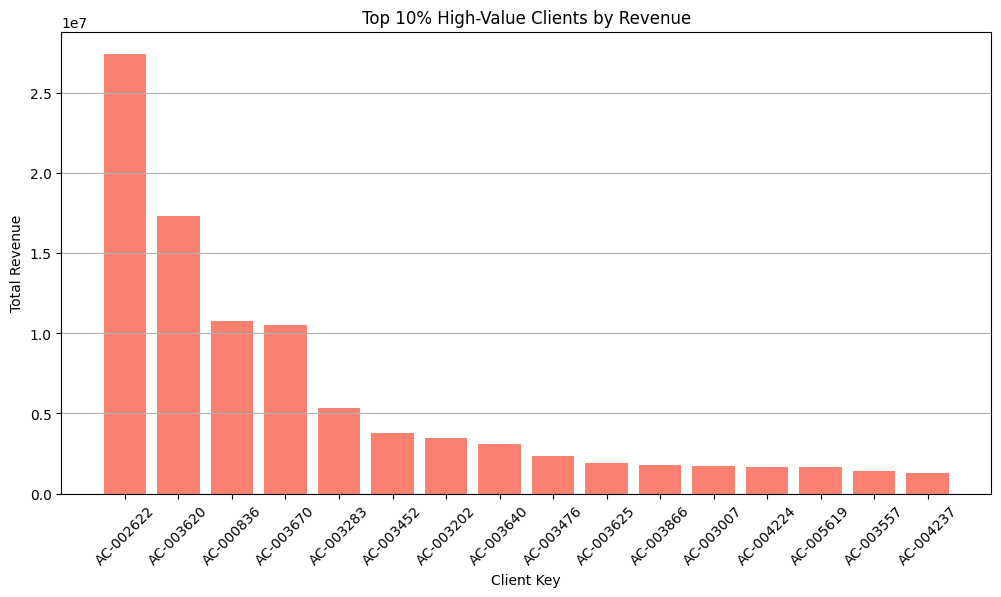

In [114]:
# Calculate total revenue per client
client_revenue = data.groupby('Client Key')['Rev'].sum().reset_index()
client_revenue = client_revenue.sort_values(by='Rev', ascending=False)

# Determine top 10% clients by revenue
top_clients = client_revenue.head(int(len(client_revenue) * 0.1))

# Display the top clients
print("Top 10% High-Value Clients by Revenue")
print(top_clients)

# Viuslaize this data
plt.figure(figsize=(12, 6))
plt.bar(top_clients['Client Key'], top_clients['Rev'], color='salmon')
plt.title('Top 10% High-Value Clients by Revenue')
plt.xlabel('Client Key')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')

In [ ]:
'''
Business Insights:

Revenue Concentration Among Top Clients:

1.) A small group of clients (the top 10%) contributes a substantial portion of total revenue, with the highest client alone generating over $25 million. This concentration suggests that these high-value clients are critical to the business's financial health. Retaining these clients should be a priority, as they provide a significant share of revenue.

2.) Potential for Personalized Engagement:
The wide disparity in revenue among the top clients indicates an opportunity for targeted, personalized engagement. Offering dedicated account managers, loyalty programs, or customized service packages to these top clients could strengthen relationships, ensuring they remain long-term partners and potentially increasing their spending.

3.) Risk of Revenue Volatility:
With revenue heavily dependent on a few key clients, there’s an inherent risk if any of these clients decide to reduce their spending or leave. This insight underscores the importance of diversifying the client base by acquiring new clients or increasing the revenue contribution from mid-tier clients to minimize the business’s exposure to revenue volatility.

'''

"\n\nRevenue Concentration Among Top Clients:\n\n1.) A small group of clients (the top 10%) contributes a substantial portion of total revenue, with the highest client alone generating over $25 million. This concentration suggests that these high-value clients are critical to the business's financial health. Retaining these clients should be a priority, as they provide a significant share of revenue.\n\n2.) Potential for Personalized Engagement:\nThe wide disparity in revenue among the top clients indicates an opportunity for targeted, personalized engagement. Offering dedicated account managers, loyalty programs, or customized service packages to these top clients could strengthen relationships, ensuring they remain long-term partners and potentially increasing their spending.\n\n3.) Risk of Revenue Volatility:\nWith revenue heavily dependent on a few key clients, there’s an inherent risk if any of these clients decide to reduce their spending or leave. This insight underscores the im

In [ ]:
# Analyzing Treatment Popularity and Seasonality

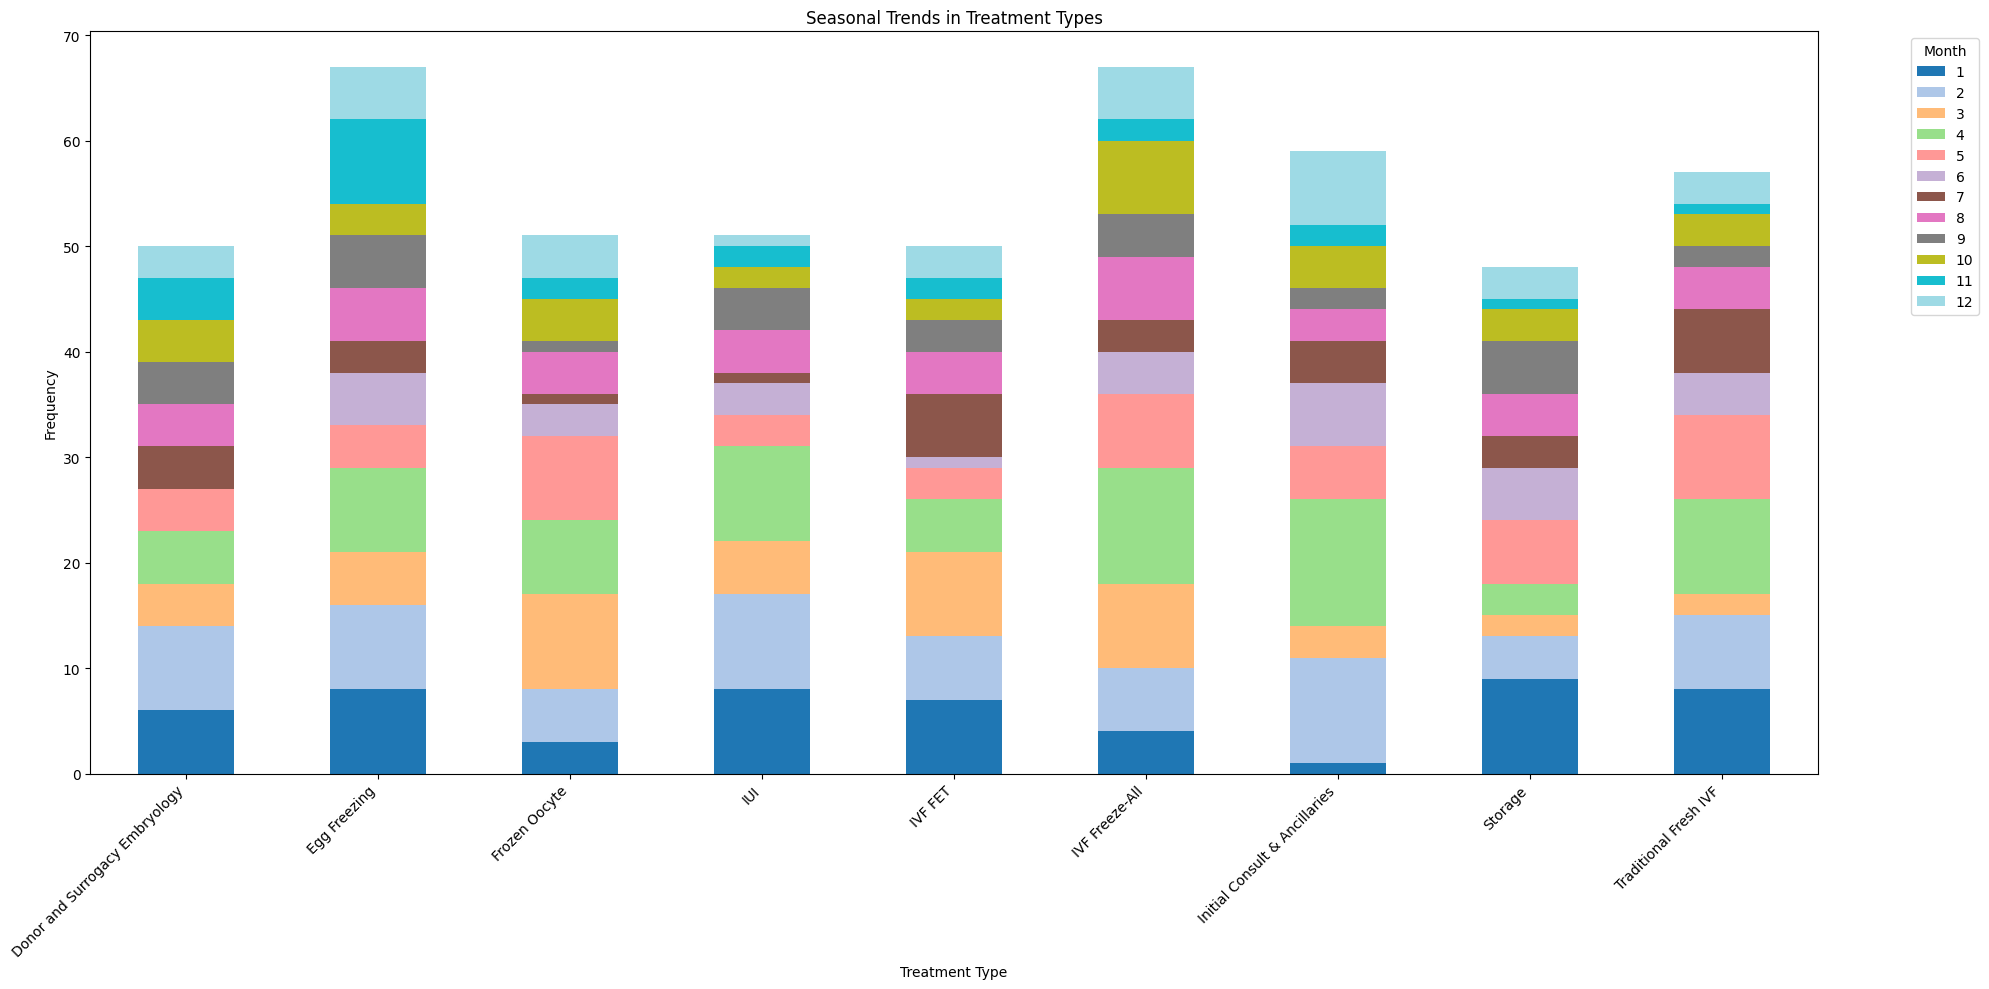

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data for demonstration
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=500, freq="D")
treatment_types = ["IVF Freeze-All", "IVF FET", "Initial Consult & Ancillaries", "IUI", "Egg Freezing", 
                   "Traditional Fresh IVF", "Donor and Surrogacy Embryology", "Storage", "Frozen Oocyte"]
data = pd.DataFrame({
    "DOS": np.random.choice(dates, 500),
    "Treatment Type": np.random.choice(treatment_types, 500)
})

# Add a 'Month' column for seasonality analysis
data['Month'] = pd.to_datetime(data['DOS']).dt.month

# Group by Treatment Type and Month to find seasonal trends
treatment_seasonality = data.groupby(['Treatment Type', 'Month']).size().unstack(fill_value=0)

# Plot the seasonal trends for each treatment type
plt.figure(figsize=(20, 10))
treatment_seasonality.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())
plt.title('Seasonal Trends in Treatment Types')
plt.xlabel('Treatment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to avoid overlap
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

In [123]:
'''

Business Insights:

1.) Consistent Demand Across Treatments:
Most treatment types show relatively consistent distribution across months, indicating that demand for these services does not significantly fluctuate seasonally. This insight suggests a steady year-round demand, allowing the business to maintain consistent staffing and resource levels without significant seasonal adjustments.

2.) Higher Demand for Egg Freezing in Specific Months:
"Egg Freezing" appears to have peak demand in a few specific months (e.g., May and October). This insight could indicate that clients prefer to schedule this service at particular times of the year. Understanding these patterns can help the business prepare for increased demand during these peak months, such as by scheduling additional staff or running targeted marketing campaigns to maximize engagement.

3.) Opportunities for Targeted Promotions in Off-Peak Months:
Some treatments, like "Donor and Surrogacy Embryology" and "Storage," have slightly lower activity in certain months. This presents an opportunity to run targeted promotions during slower months to encourage more clients to use these services. For example, offering discounts or bundled services during these periods could help smooth demand and increase utilization.

'''

'\n\nBusiness Insights:\n\n1.) Consistent Demand Across Treatments:\nMost treatment types show relatively consistent distribution across months, indicating that demand for these services does not significantly fluctuate seasonally. This insight suggests a steady year-round demand, allowing the business to maintain consistent staffing and resource levels without significant seasonal adjustments.\n\n2.) Higher Demand for Egg Freezing in Specific Months:\n"Egg Freezing" appears to have peak demand in a few specific months (e.g., May and October). This insight could indicate that clients prefer to schedule this service at particular times of the year. Understanding these patterns can help the business prepare for increased demand during these peak months, such as by scheduling additional staff or running targeted marketing campaigns to maximize engagement.\n\n3.) Opportunities for Targeted Promotions in Off-Peak Months:\nSome treatments, like "Donor and Surrogacy Embryology" and "Storage,"